# 데이터 정의 및 분석 목적

## 데이터 정의

핀성형기 장비 데이터

  - 설비이름_START : 설비이름/가동 (단위 : ON/OFF, ON=1, OFF=0) (Type: int64)
  
  - 설비이름_STOP : 설비이름/정지 (단위 : ON/OFF, ON=1, OFF=0) (Type: int64)
  
  - 설비이름_CNT : 설비이름/생산수량 (단위: EA) (Type: float64)
  
  - 설비이름_VOLT_N상 : 설비이름/N상 전압 (단위: V) (Type: float64)
  
  - 설비이름_VOLT_AVG : 설비이름/평균 전압 (단위 : V) (Type: float64)
  
  - 설비이름_CURR_N상 : 설비이름/N상 전류 (단위 : A) (Type: float64)
  
  - 설비이름_CURR_AVG : 설비이름/평균 전류 (단위 : A) (Type: float64)
  
  - 설비이름_KW : 설비이름/유효전력 (단위 : KW) (Type: float64)
  
  - 설비이름_KVAR : 설비이름/무효전력 (단위 : KVAR) (Type: float64)
  
  - 설비이름_HZ : 설비이름/주파수 (단위 : HZ) (Type: float64)
  
  - 설비이름_PWR_FACTOR : 설비이름/역률 (단위 : %) (Type: float64)
  
  - 설비이름_KWH : 설비이름/유효전력량 (단위 : KWH) (Type: float64)
 
  - 설비이름_KVARH : 설비이름/무효전력량 (단위 : KVARH) (Type: float64)

## 분석 목적

핀성형기 가동정보 데이터를 바탕으로 설치된 센서 데이터를 확인하여 핀성형기 START/STOP의 구분점을 찾는 것을 목표

# 라이브러리 불러오기

In [31]:
# 데이터 전처리
import pandas as pd
import numpy as np
import sys
import pickle
import itertools

# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 딥러닝 모델
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib # 모델 저장 및 로딩하는 라이브러리
import warnings
np.set_printoptions(threshold = sys.maxsize) # NumPY에서 출력되는 배열의 요소 수 제한을 설정하는 함수
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

In [50]:
df = pd.read_csv('./data/핀성형기_가동정보_데이터.csv', index_col = 0)

df

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158395,1,0,37264.135652,117.963176,119.093252,117.564746,117.971809,2.000782,1.920502,2.918832,2.268180,0.655435,0.307923,33.070395,39.737414,932.070719,444.178325
158396,1,0,37264.135652,117.940137,119.117996,117.563097,117.779577,1.983791,1.798708,2.930544,2.233814,0.651036,0.310122,32.991709,39.560524,932.070719,444.178325
158397,1,0,37264.685514,117.974283,119.141695,117.588445,117.685716,1.987641,1.930180,2.922186,2.268180,0.655435,0.310122,32.883881,39.525662,932.070719,444.178325
158398,1,0,37264.685514,118.116313,119.289058,117.191005,118.589689,1.985881,1.856004,2.950284,2.250969,0.651036,0.310122,32.937933,39.109747,932.070719,444.178325


# 데이터 전처리

가동정보 START(ON = 1)데이터 집합을 변수로 선언

In [3]:
start_on = df[df['MAKING1_START'] == 1]

start_on

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158395,1,0,37264.135652,117.963176,119.093252,117.564746,117.971809,2.000782,1.920502,2.918832,2.268180,0.655435,0.307923,33.070395,39.737414,932.070719,444.178325
158396,1,0,37264.135652,117.940137,119.117996,117.563097,117.779577,1.983791,1.798708,2.930544,2.233814,0.651036,0.310122,32.991709,39.560524,932.070719,444.178325
158397,1,0,37264.685514,117.974283,119.141695,117.588445,117.685716,1.987641,1.930180,2.922186,2.268180,0.655435,0.310122,32.883881,39.525662,932.070719,444.178325
158398,1,0,37264.685514,118.116313,119.289058,117.191005,118.589689,1.985881,1.856004,2.950284,2.250969,0.651036,0.310122,32.937933,39.109747,932.070719,444.178325


가동정보 START(OFF=0) 데이터 집합을 변수로 선언

In [4]:
start_off = df[df['MAKING1_START'] == 0]

start_off

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
3600,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3601,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3602,0,1,20552.185307,120.740308,121.770145,120.278369,120.503868,1.884596,1.647551,2.720331,2.079138,0.606992,0.343114,32.867825,38.318991,901.443470,428.947152
3603,0,1,20552.185307,120.890421,121.917508,120.409951,120.738274,1.868540,1.618903,2.736497,2.070560,0.606992,0.343114,32.854244,38.231123,901.443470,428.947152
3604,0,1,20552.185307,120.886572,121.901177,120.392356,120.841978,1.831700,1.627701,2.702571,2.053349,0.606992,0.345313,33.070395,38.489283,901.443470,428.947152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155517,0,1,37003.501149,116.273176,117.364652,115.867543,116.350981,1.926936,1.789745,3.020391,2.233814,0.624643,0.305668,32.883881,37.698801,931.575843,443.903394
155518,0,1,37003.501149,116.458039,117.123537,116.113661,116.708886,1.913739,1.710895,3.022865,2.199447,0.624643,0.307923,33.021347,38.004305,931.575843,443.903394
155519,0,1,37003.501149,116.531666,117.191390,116.161169,117.028741,1.891250,1.699898,3.009614,2.199447,0.624643,0.307923,32.854244,38.181745,931.575843,443.903394
155520,0,1,37003.501149,116.498839,117.219048,116.164908,116.825072,1.903567,1.685326,3.016927,2.199447,0.620244,0.305668,32.854244,37.899556,931.575843,443.903394


가동정보 STOP(ON=1) 데이터 집합을 변수로 선언

In [5]:
stop_on = df[df['MAKING1_STOP'] == 1]

stop_on

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
3600,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3601,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3602,0,1,20552.185307,120.740308,121.770145,120.278369,120.503868,1.884596,1.647551,2.720331,2.079138,0.606992,0.343114,32.867825,38.318991,901.443470,428.947152
3603,0,1,20552.185307,120.890421,121.917508,120.409951,120.738274,1.868540,1.618903,2.736497,2.070560,0.606992,0.343114,32.854244,38.231123,901.443470,428.947152
3604,0,1,20552.185307,120.886572,121.901177,120.392356,120.841978,1.831700,1.627701,2.702571,2.053349,0.606992,0.345313,33.070395,38.489283,901.443470,428.947152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155519,0,1,37003.501149,116.531666,117.191390,116.161169,117.028741,1.891250,1.699898,3.009614,2.199447,0.624643,0.307923,32.854244,38.181745,931.575843,443.903394
155520,0,1,37003.501149,116.498839,117.219048,116.164908,116.825072,1.903567,1.685326,3.016927,2.199447,0.620244,0.305668,32.854244,37.899556,931.575843,443.903394
155521,0,1,37004.051011,116.523363,117.237689,116.186133,116.660444,1.895869,1.675429,3.020611,2.190814,0.624643,0.303469,32.854244,38.086124,931.575843,443.903394
155522,1,1,37004.051011,116.379629,117.648380,115.487863,116.832825,1.819603,1.670645,2.859831,2.113504,0.615845,0.301269,32.854244,37.890538,931.575843,443.903394


가동정보 STOP(OFF=0) 데이터 집합을 변수로 선언

In [6]:
stop_off = df[df['MAKING1_STOP'] == 0]

stop_off

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158395,1,0,37264.135652,117.963176,119.093252,117.564746,117.971809,2.000782,1.920502,2.918832,2.268180,0.655435,0.307923,33.070395,39.737414,932.070719,444.178325
158396,1,0,37264.135652,117.940137,119.117996,117.563097,117.779577,1.983791,1.798708,2.930544,2.233814,0.651036,0.310122,32.991709,39.560524,932.070719,444.178325
158397,1,0,37264.685514,117.974283,119.141695,117.588445,117.685716,1.987641,1.930180,2.922186,2.268180,0.655435,0.310122,32.883881,39.525662,932.070719,444.178325
158398,1,0,37264.685514,118.116313,119.289058,117.191005,118.589689,1.985881,1.856004,2.950284,2.250969,0.651036,0.310122,32.937933,39.109747,932.070719,444.178325


# 훈련용 데이터 셋 만들기

## 종속변수 = START(ON/OFF) 데이터 셋

In [7]:
X = np.array(df.iloc[:, 2:]) # start빼고
Y_start = np.array(df.iloc[:, 0])
Y_start = Y_start.reshape(-1, 1)

In [8]:
print(X.shape, Y_start.shape)

(158400, 15) (158400, 1)


## 종속변수 = STOP(ON/OFF) 데이터 셋

In [9]:
X = np.array(df.iloc[:, 2:]) # stop빼고
Y_stop = np.array(df.iloc[:, 1])
Y_stop = Y_stop.reshape(-1, 1)

In [10]:
print(X.shape, Y_stop.shape)

(158400, 15) (158400, 1)


# 모델링

- precision : 모델이 positive이라 분류한 것 중 실제  positive인 비율

- accuracy : 전체 중 모델이 바르게 분류한 비율

- recall : 실제 값이 positive인 것 중 모델이 올바르게 분류한 비율

- r1 : precision과 recall의  조화 평균

## 종속변수 = START(ON/OFF) 모델

데이터 나누기

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_start, test_size = 0.3, shuffle = True, random_state = 1004)

### 로지스틱 회귀

accuracy :  0.5651936026936027
precision :  0.5681535931259021
recall :  0.6846661003923472
f1 :  0.6209920023479346

TN FP FN TP :  9931 12866 7796 16927


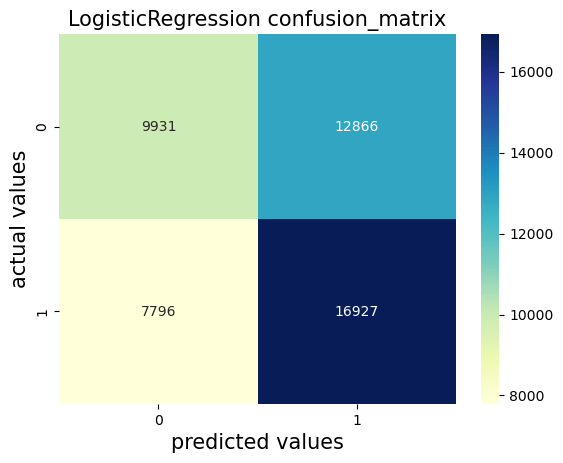

In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 혼동행렬
confusion_matrix(y_test, y_pred)
print('accuracy : ', accuracy_score(y_test, y_pred))
print('precision : ', precision_score(y_test, y_pred))
print('recall : ', recall_score(y_test, y_pred))
print('f1 : ', f1_score(y_test, y_pred))

print()

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt=".0f",cmap='YlGnBu')
plt.xlabel('predicted values', size = 15)
plt.ylabel('actual values', size = 15)
plt.title('LogisticRegression confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('TN FP FN TP : ', tn, fp, fn, tp)

=> 로지스틱 모델의 경우 

positive로 예측한 데이터 중 약 56.8%가 실제로 positive이다

실제 positive인 데이터 중 약 68.5%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 62.1%이다

### 의사결정나무 분류

accuracy 0.9947180134680135
precision 0.9945037180730683
recall 0.995348460947296
f1 0.9949259102027614

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22797
           1       0.99      1.00      0.99     24723

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520


TN, FP, FN, TP :  22661 136 115 24608


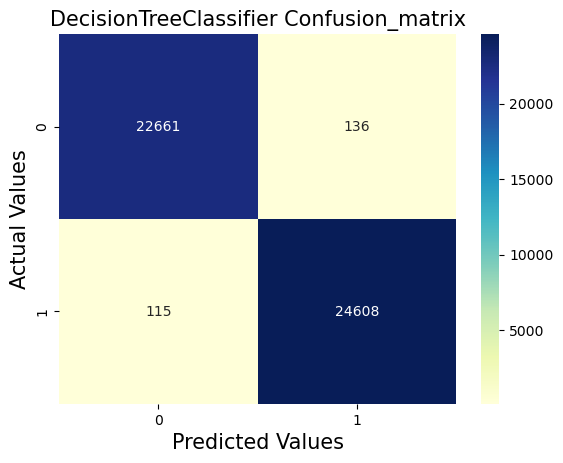

In [56]:
clf = DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

print('accuracy', accuracy_score(y_test, prediction))
print('precision', precision_score(y_test, prediction))
print('recall', recall_score(y_test, prediction))
print('f1', f1_score(y_test, prediction))

print()

print(classification_report(y_test, prediction))

print()

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('DecisionTreeClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

=> 의사결정나무 모델의 경우

positive로 예측한 데이터 중 약 99.5%가 실제로 positive이다

실제 positive인 데이터 중 약 99.5%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 99.5%이다

### 랜덤포레스트 분류

accuracy 0.9987373737373737
precision 0.9984236692130471
recall 0.9991505885208106
f1 0.9987869966035905

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22797
           1       1.00      1.00      1.00     24723

    accuracy                           1.00     47520
   macro avg       1.00      1.00      1.00     47520
weighted avg       1.00      1.00      1.00     47520


TN, FP, FN, TP :  22758 39 21 24702


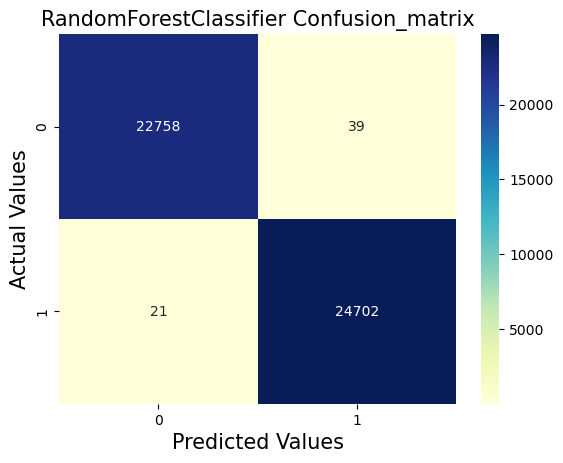

In [57]:
rf = RandomForestClassifier(n_estimators = 100, criterion='gini')
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred_forest))
print('precision', precision_score(y_test, y_pred_forest))
print('recall', recall_score(y_test, y_pred_forest))
print('f1', f1_score(y_test, y_pred_forest))

print()

print(classification_report(y_test, y_pred_forest))

print()

sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('RandomForestClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_forest).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

=> 랜덤포레스트 모델의 경우

positive로 예측한 데이터 중 약 99.8%가 실제로 positive이다

실제 positive인 데이터 중 약 99.8%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 99.8%이다

### XGBoost 분류

accuracy 0.5202651515151515
precision 0.5202651515151515
recall 1.0
f1 0.6844400149495453

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22797
           1       0.52      1.00      0.68     24723

    accuracy                           0.52     47520
   macro avg       0.26      0.50      0.34     47520
weighted avg       0.27      0.52      0.36     47520


TN, FP, FN, TP :  0 22797 0 24723


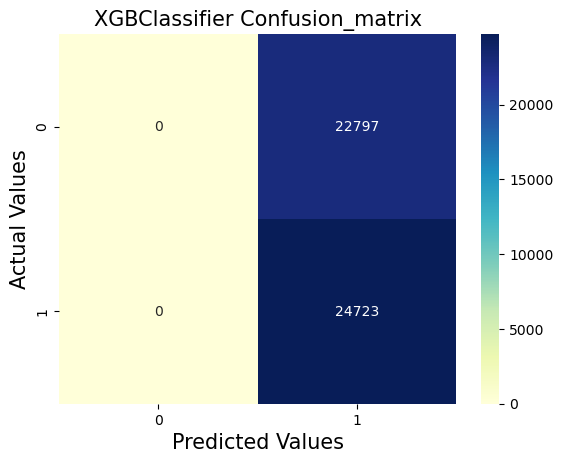

In [58]:
xgb = XGBClassifier(learning_rate = 0.0001, objective = 'reg:squarederror') # object는 목적 함수 : 회귀 모델의 손실 함수를 지정. 예를 들어, 평균 제곱 오차를 최소화하는 모델을 학습할 때는 reg:squarederror를 사용
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print('accuracy', accuracy_score(y_test, xgb_pred))
print('precision', precision_score(y_test, xgb_pred))
print('recall', recall_score(y_test, xgb_pred))
print('f1', f1_score(y_test, xgb_pred))

print()

# 자세한 분류 보고서
print(classification_report(y_test, xgb_pred))

print()

sns.heatmap(confusion_matrix(y_test, xgb_pred), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('XGBClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, xgb_pred).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

=> XGBoost 모델의 경우

positive로 예측한 데이터 중 약 52%가 실제로 positive이다

실제 positive인 데이터 중 약 1%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 68.4%이다

* XGBoost의 learning_rate를 0.0001로 했을 경우 결과가 좋지 않아 그리드 서치를 사용해 최적의 learning_rete 찾기

In [59]:
# xgb 모델 선언

xgb = XGBClassifier(objective = 'reg:squarederror')

#튜닝에 사용할 파라미터 나열
params = {'learning_rate' : [0.1, 0.01, 0.001, 0.0001]}

# 그리드 서치 모델 선언
grid = GridSearchCV(estimator = xgb,
                    param_grid = params,
                    cv = 5,
                    verbose = 2)

# 그리드 서치 학습
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.3s
[CV] END .................................learning_rate=0.01; total time=   0.3s
[CV] END .................................learning_rate=0.01; total time=   0.3s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END ................................learning_rate=0.001; total time=   0.3s
[CV] END ................................learning

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='reg:squarederror', ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [60]:
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.1}
0.9951930014430014


최적의 파라미터를 사용해 다시 xgb 모델 구성

accuracy 0.9951178451178451
precision 0.9945079352259419
recall 0.996116976095134
f1 0.9953118053590916

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22797
           1       0.99      1.00      1.00     24723

    accuracy                           1.00     47520
   macro avg       1.00      1.00      1.00     47520
weighted avg       1.00      1.00      1.00     47520


TN, FP, FN, TP :  22661 136 96 24627


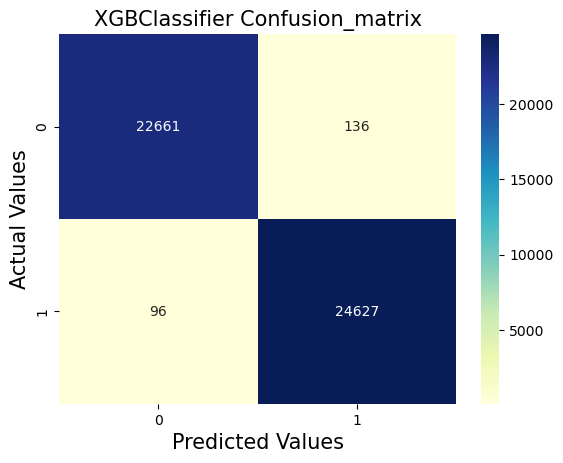

In [61]:
xgb = XGBClassifier(learning_rate = 0.1, objective = 'reg:squarederror') # object는 목적 함수 : 회귀 모델의 손실 함수를 지정. 예를 들어, 평균 제곱 오차를 최소화하는 모델을 학습할 때는 reg:squarederror를 사용
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print('accuracy', accuracy_score(y_test, xgb_pred))
print('precision', precision_score(y_test, xgb_pred))
print('recall', recall_score(y_test, xgb_pred))
print('f1', f1_score(y_test, xgb_pred))

print()

# 자세한 분류 보고서
print(classification_report(y_test, xgb_pred))

print()

sns.heatmap(confusion_matrix(y_test, xgb_pred), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('XGBClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, xgb_pred).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

=> XGBoost 모델의 경우

positive로 예측한 데이터 중 약 99.5%가 실제로 positive이다

실제 positive인 데이터 중 약 99.6%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 99.5%이다

In [43]:
xgb_res = pd.DataFrame()
xgb_res['start'] = xgb_pred

xgb_res.head()

,start
0,0
1,0
2,0
3,1
4,1


## 종속변수 = STOP(ON/OFF) 모델

데이터 나누기

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_stop, test_size = 0.3, shuffle = True, random_state = 1004)

### 로지스틱 회귀

accuracy :  0.629503367003367
precision :  0.6268588632424049
recall :  0.33702849855299943
f1 :  0.4383692739568712

TN FP FN TP :  23043 4090 13516 6871


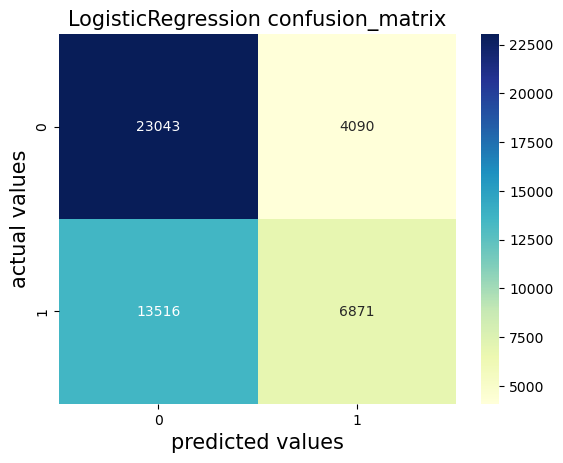

In [63]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 혼동행렬
confusion_matrix(y_test, y_pred)
print('accuracy : ', accuracy_score(y_test, y_pred))
print('precision : ', precision_score(y_test, y_pred))
print('recall : ', recall_score(y_test, y_pred))
print('f1 : ', f1_score(y_test, y_pred))

print()

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt=".0f",cmap='YlGnBu')
plt.xlabel('predicted values', size = 15)
plt.ylabel('actual values', size = 15)
plt.title('LogisticRegression confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('TN FP FN TP : ', tn, fp, fn, tp)

=> 로지스틱 모델의 경우

positive로 예측한 데이터 중 약 62.7%가 실제로 positive이다

실제 positive인 데이터 중 약 33.7%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 43.8%이다

### 의사결정나무 분류

accuracy 0.9891414141414141
precision 0.9878234398782344
recall 0.9868543679795948
f1 0.9873386661432005

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27133
           1       0.99      0.99      0.99     20387

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520


TN, FP, FN, TP :  26885 248 268 20119


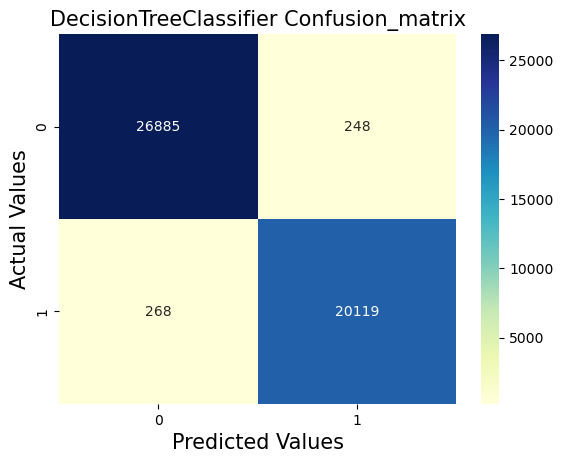

In [64]:
clf = DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

print('accuracy', accuracy_score(y_test, prediction))
print('precision', precision_score(y_test, prediction))
print('recall', recall_score(y_test, prediction))
print('f1', f1_score(y_test, prediction))

print()

print(classification_report(y_test, prediction))

print()

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('DecisionTreeClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

=> 의사결정나무 모델의 경우

positive로 예측한 데이터 중 약 98.9%가 실제로 positive이다

실제 positive인 데이터 중 약 98.8%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 98.8%이다

### 랜덤포레스트 분류

accuracy 0.9947811447811448
precision 0.9928539963780529
recall 0.9949968116937264
f1 0.9939242491057867

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     27133
           1       0.99      0.99      0.99     20387

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520


TN, FP, FN, TP :  26987 146 102 20285


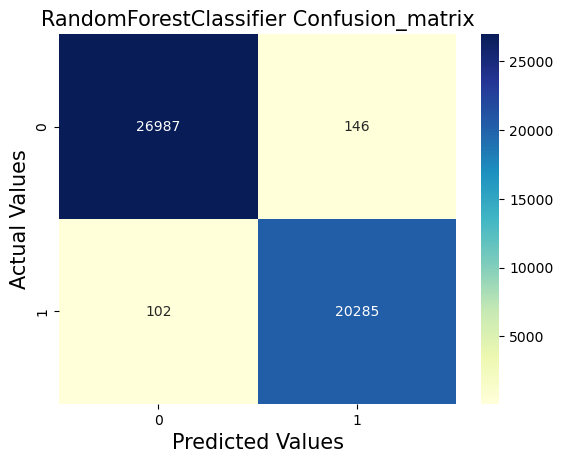

In [65]:
rf = RandomForestClassifier(n_estimators = 100,criterion='gini')
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred_forest))
print('precision', precision_score(y_test, y_pred_forest))
print('recall', recall_score(y_test, y_pred_forest))
print('f1', f1_score(y_test, y_pred_forest))

print()

print(classification_report(y_test, y_pred_forest))

print()

sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('RandomForestClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_forest).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

=> 랜덤포레스트 모델의 경우

positive로 예측한 데이터 중 약 99.3%가 실제로 positive이다

실제 positive인 데이터 중 약 99.5%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 99.4%이다

### XGBoost 분류

accuracy 0.5709806397306397
precision 0.0
recall 0.0
f1 0.0

              precision    recall  f1-score   support

           0       0.57      1.00      0.73     27133
           1       0.00      0.00      0.00     20387

    accuracy                           0.57     47520
   macro avg       0.29      0.50      0.36     47520
weighted avg       0.33      0.57      0.42     47520


TN, FP, FN, TP :  27133 0 20387 0


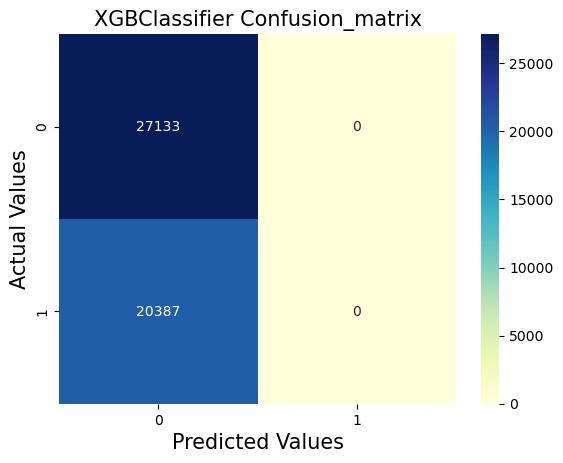

In [66]:
xgb = XGBClassifier(learning_rate = 0.0001,objective = 'reg:squarederror')
xgb.fit(np.array(X_train),np.array(y_train))
xgb_pred = xgb.predict(np.array(X_test))

print('accuracy', accuracy_score(y_test, xgb_pred))
print('precision', precision_score(y_test, xgb_pred))
print('recall', recall_score(y_test, xgb_pred))
print('f1', f1_score(y_test, xgb_pred))

print()

# 자세한 분류 보고서
print(classification_report(y_test, xgb_pred))

print()

sns.heatmap(confusion_matrix(y_test, xgb_pred), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('XGBClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, xgb_pred).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

=> XGBoost 모델의 경우

positive로 예측한 데이터 중 약 0%가 실제로 positive이다

실제 positive인 데이터 중 약 0%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 0%이다

* XGBoost의 learning_rate를 0.0001로 했을 경우 결과가 좋지 않아 그리드 서치를 사용해 최적의 learning_rete 찾기

In [67]:
# xgb 모델 선언

xgb = XGBClassifier(objective = 'reg:squarederror')

#튜닝에 사용할 파라미터 나열
params = {'learning_rate' : [0.1, 0.01, 0.001, 0.0001]}

# 그리드 서치 모델 선언
grid = GridSearchCV(estimator = xgb,
                    param_grid = params,
                    cv = 5,
                    verbose = 2)

# 그리드 서치 학습
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END ................................learning_rate=0.001; total time=   0.2s
[CV] END ................................learning

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='reg:squarederror', ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [68]:
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.1}
0.984505772005772


accuracy 0.9830176767676768
precision 0.9749660392004658
recall 0.9857261980673959
f1 0.9803165930876363

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     27133
           1       0.97      0.99      0.98     20387

    accuracy                           0.98     47520
   macro avg       0.98      0.98      0.98     47520
weighted avg       0.98      0.98      0.98     47520


TN, FP, FN, TP :  26617 516 291 20096


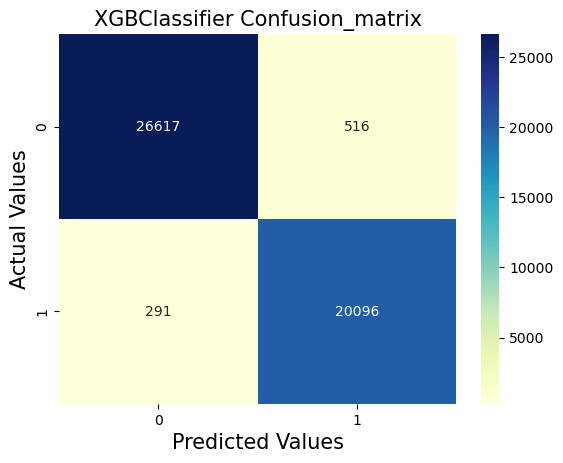

In [69]:
xgb = XGBClassifier(learning_rate = 0.1,objective = 'reg:squarederror')
xgb.fit(np.array(X_train),np.array(y_train))
xgb_pred = xgb.predict(np.array(X_test))

print('accuracy', accuracy_score(y_test, xgb_pred))
print('precision', precision_score(y_test, xgb_pred))
print('recall', recall_score(y_test, xgb_pred))
print('f1', f1_score(y_test, xgb_pred))

print()

# 자세한 분류 보고서
print(classification_report(y_test, xgb_pred))

print()

sns.heatmap(confusion_matrix(y_test, xgb_pred), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('XGBClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, xgb_pred).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

=> XGBoost 모델의 경우

positive로 예측한 데이터 중 약 97.5%가 실제로 positive이다

실제 positive인 데이터 중 약 98.6%로 올바르게 예측했다

모델의 정밀도와 재현율의 조화 평균이 약 98.0%이다

In [48]:
xgb_res['stop'] = xgb_pred

XGBoost 모델을 사용한 결과

In [49]:
xgb_res

,start,stop
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0
...,...,...
47515,1,0
47516,1,1
47517,1,0
47518,1,0


시작 모델과 종료 모델을 각각 훈련시킨 후에는 새로운 데이터에 대해 각 모델을 사용하여 시작과 종료를 예측할 수 있다.

시작 모델의 결과와 종료 모델의 결과가 각각 2개씩 나오며, 이를 종합하여 핀성형기의 시작과 종료를 식별할 수 있다.